In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
df = pd.read_csv("/content/drive/MyDrive/dataset/data_core_with_yield.csv")

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop Yield
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea,4609
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP,6456
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14,1058
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28,2434
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea,4125


In [ ]:
df.shape

(8000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
 9   Crop Yield       8000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 625.1+ KB


In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop Yield
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500,3160.003250
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113,1908.815448
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000,1000.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000,1932.750000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000,2514.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000,3572.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000,9995.000000


In [ ]:
df.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0
Crop Yield,0


In [ ]:
df.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorus,Fertilizer Name,Crop Yield
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea,4609
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP,6456
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14,1058
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28,2434
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea,4125


In [ ]:
print("'14=35-14' in df['Fertilizer Name'].unique():", '28-28' in df['Fertilizer Name'].unique())

'14=35-14' in df['Fertilizer Name'].unique(): True


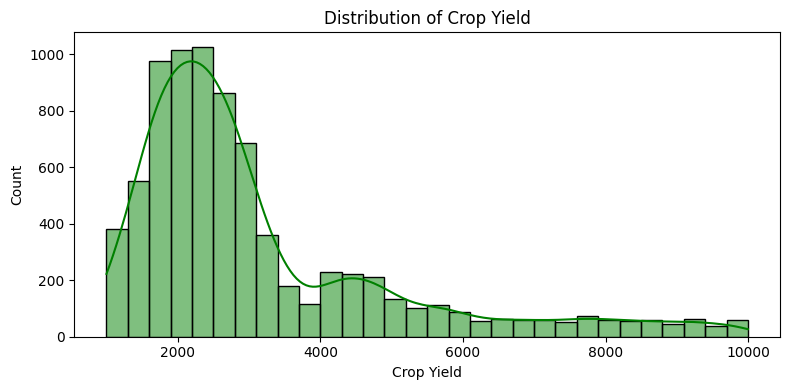

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["Crop Yield"], bins=30, kde=True, color="green")
plt.title("Distribution of Crop Yield")
plt.xlabel("Crop Yield")
plt.tight_layout()
plt.show()

In [ ]:
df = df.rename(columns={'Temparature': 'Temperature', 'Phosphorous': 'Phosphorus'})
print(df.columns)

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorus', 'Fertilizer Name', 'Crop Yield'],
      dtype='object')


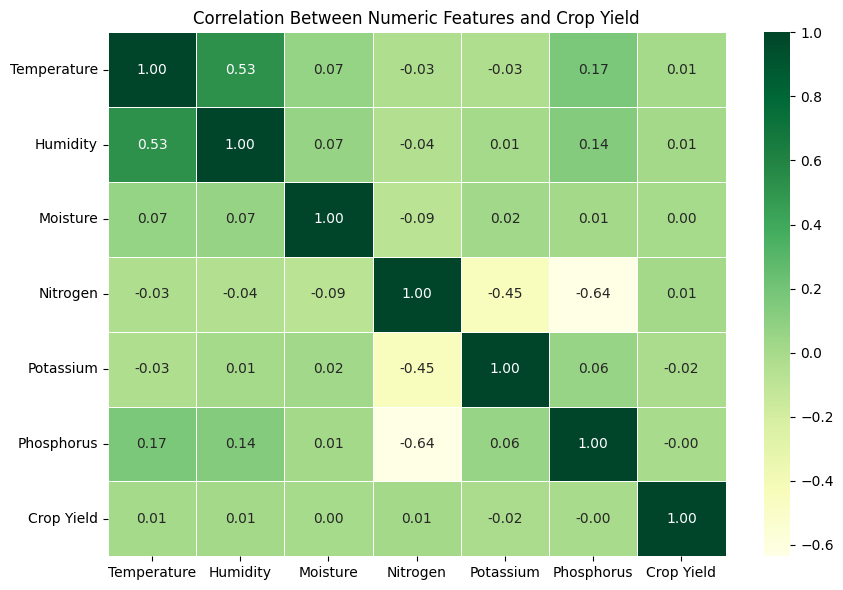

In [ ]:
numeric_cols = ["Temperature", "Humidity", "Moisture", "Nitrogen", "Potassium", "Phosphorus", "Crop Yield"]

plt.figure(figsize=(9, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="YlGn", linewidths=0.5)
plt.title("Correlation Between Numeric Features and Crop Yield")
plt.tight_layout()
plt.show()

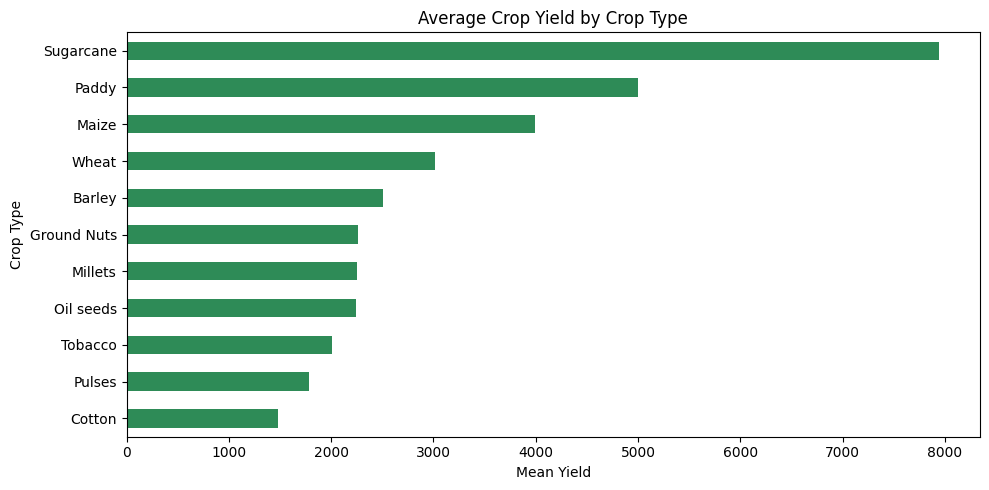

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby("Crop Type")["Crop Yield"].mean().sort_values().plot(kind="barh", color="seagreen")
plt.title("Average Crop Yield by Crop Type")
plt.xlabel("Mean Yield")
plt.tight_layout()
plt.show()

Based on the correlation values, the features with the strongest correlation (highest absolute value) to 'Crop Yield' are:

*   **Potassium:** (Positive correlation)
*   **Nitrogen:** (Positive correlation)
*   **Phosphorus:** (Positive correlation)
*   **Moisture:** (Positive correlation)

These features show a more significant linear relationship with crop yield compared to Temperature and Humidity in your dataset.

In [ ]:
sugarcane_data = df[df['Crop Type'] == 'Sugarcane']
display(sugarcane_data.head())

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorus,Fertilizer Name,Crop Yield
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP,6456
15,31.0,62.0,49.0,Black,Sugarcane,10,13,14,17-17-17,6552
21,34.0,65.0,53.0,Loamy,Sugarcane,12,14,12,17-17-17,9078
27,32.0,62.0,30.0,Loamy,Sugarcane,38,0,0,Urea,8392
31,30.0,60.0,27.0,Loamy,Sugarcane,12,0,40,DAP,9135


In [ ]:
print("Unique Soil Types for Sugarcane:")
print(sugarcane_data['Soil Type'].unique())

print("\nUnique Fertilizer Names for Sugarcane:")
print(sugarcane_data['Fertilizer Name'].unique())

Unique Soil Types for Sugarcane:
['Loamy' 'Black' 'Clayey' 'Red' 'Sandy']

Unique Fertilizer Names for Sugarcane:
['DAP' '17-17-17' 'Urea' '14-35-14' '20-20' '10-26-26' '28-28']


In [ ]:
print("\nDescriptive Statistics for Sugarcane Data:")
display(sugarcane_data.describe())


Descriptive Statistics for Sugarcane Data:


,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorus,Crop Yield
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,30.485033,59.360105,43.548938,18.764089,3.657929,18.466579,7946.660550
std,4.509073,8.319623,12.953454,12.045165,5.314977,13.491997,1134.626236
min,20.030000,40.230000,20.000000,0.000000,0.000000,0.000000,6002.000000
25%,27.025000,53.060000,33.610000,10.000000,0.000000,7.000000,6989.000000
50%,30.440000,59.340000,42.030000,14.000000,1.000000,18.000000,7892.000000
75%,33.715000,65.190000,53.700000,26.000000,4.000000,31.000000,8913.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,45.000000,9995.000000


In [ ]:
average_yields = df.groupby("Crop Type")["Crop Yield"].mean().sort_values(ascending=False)
print("Average Crop Yields by Crop Type:\n", average_yields.head()) # Showing top 5 for illustration

Average Crop Yields by Crop Type:
 Crop Type
Sugarcane    7946.660550
Paddy        4998.655807
Maize        3995.333333
Wheat        3012.068273
Barley       2502.568990
Name: Crop Yield, dtype: float64


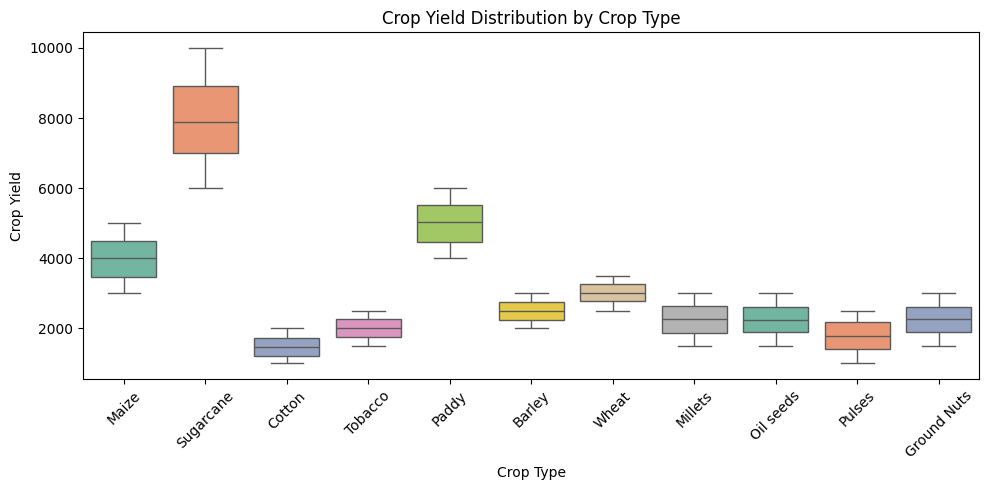

In [43]:
# Replace palette="Set2" with hue= to fix the warning
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Crop Type", y="Crop Yield", hue="Crop Type", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Crop Yield Distribution by Crop Type")
plt.tight_layout()
plt.show()

### Violin Plot: Crop Yield Distribution by Crop Type

A violin plot combines aspects of a box plot and a kernel density plot. It shows the distribution of quantitative data across several categories. The 'violin' shape shows the density of the data, with wider sections indicating a higher probability of observations. Inside, a mini box plot often shows the median and interquartile ranges, similar to a standard box plot.

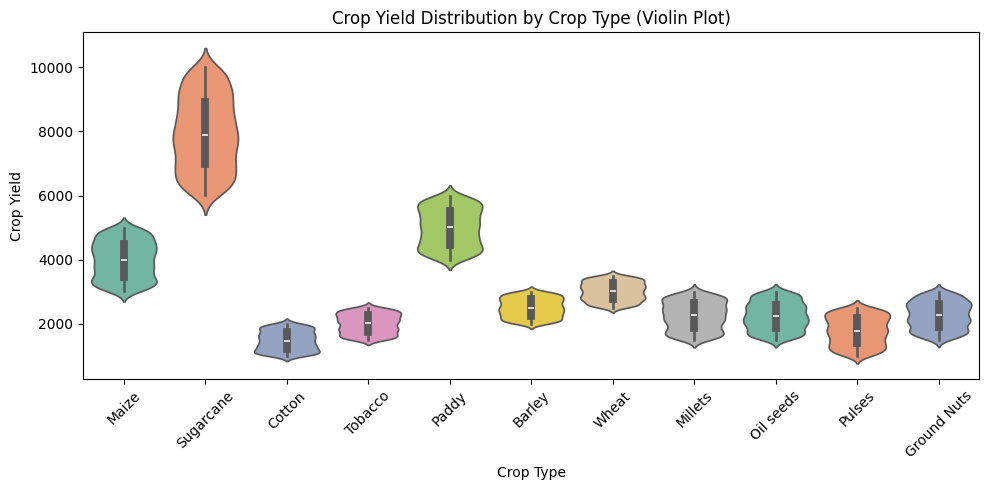

In [46]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="Crop Type", y="Crop Yield", hue="Crop Type", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Crop Yield Distribution by Crop Type (Violin Plot)")
plt.tight_layout()
plt.show()

In [45]:
# Model 1 — With sugarcane ( original)
df_with = df.copy()

# Model 2 — Without sugarcane
df_without = df[df["Crop Type"] != "Sugarcane"].copy()

print(f"With sugarcane:    {len(df_with)} rows")
print(f"Without sugarcane: {len(df_without)} rows")

With sugarcane:    8000 rows
Without sugarcane: 7237 rows


In [48]:
df_encoded_with = pd.get_dummies(df_with, columns=["Soil Type", "Crop Type", "Fertilizer Name"], drop_first=True)
df_encoded_without = pd.get_dummies(df_without, columns=["Soil Type", "Crop Type", "Fertilizer Name"], drop_first=True)
df_encoded_with.shape
df_encoded_without.shape

df_encoded_with.head()
df_encoded_without.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop Yield,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,26.0,52.0,38.0,37,0,0,4609,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,34.0,65.0,62.0,7,9,30,1058,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,32.0,62.0,34.0,22,0,20,2434,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,28.0,54.0,46.0,35,0,0,4125,True,False,False,...,True,False,False,False,False,False,False,False,False,True
5,26.0,52.0,35.0,12,10,13,2381,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [49]:
# Target variable
y = df_encoded_with["Crop Yield"]

# All other columns are features
X = df_encoded_with.drop(columns=["Crop Yield"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set:     {X_test.shape[0]} rows")

Training set: 6400 rows
Test set:     1600 rows


In [56]:
# Target variable
y1 = df_encoded_without["Crop Yield"]

# All other columns are features
X1 = df_encoded_without.drop(columns=["Crop Yield"])

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

print(f"Training set: {X1_train.shape[0]} rows")
print(f"Test set:     {X1_test.shape[0]} rows")

Training set: 5789 rows
Test set:     1448 rows


In [50]:
scaler1 = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [57]:
scaler1 = StandardScaler()

X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled  = scaler1.transform(X1_test)

In [58]:
model1 = LinearRegression()
model1.fit(X1_train_scaled, y1_train)

print("Model 2 training complete!")

Model 2 training complete!


In [53]:
y_pred = model.predict(X_test_scaled)

# Preview first 10 predictions vs actual values
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred.round(2)})
print(results.head(10))

   Actual  Predicted
0    1417    1731.79
1    2545    2491.42
2    8389    7911.84
3    5343    5019.63
4    9171    7941.16
5    1796    2017.99
6    3278    3023.20
7    1576    2246.27
8    1699    2243.33
9    3136    3017.35


In [60]:
y1_pred = model1.predict(X1_test_scaled)

# Preview first 10 predictions vs actual values
results = pd.DataFrame({"Actual": y1_test.values, "Predicted": y1_pred.round(2)})
print(results.head(10))

   Actual  Predicted
0    2011    2212.60
1    4482    3973.08
2    2196    1737.30
3    2562    2241.80
4    5854    4986.85
5    3287    3021.14
6    1878    1460.87
7    1303    1750.22
8    1349    1776.16
9    2939    2973.86


In [54]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("Model Performance")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Model Performance
MAE:  420.32
RMSE: 544.24
R²:   0.9251


In [61]:
mae1  = mean_absolute_error(y1_test, y1_pred)
mse1  = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse)
r21   = r2_score(y1_test, y1_pred)

print("Model Performance")
print(f"MAE:  {mae1:.2f}")
print(f"RMSE: {rmse1:.2f}")
print(f"R²:   {r21:.4f}")

Model Performance
MAE:  355.22
RMSE: 544.24
R²:   0.8398


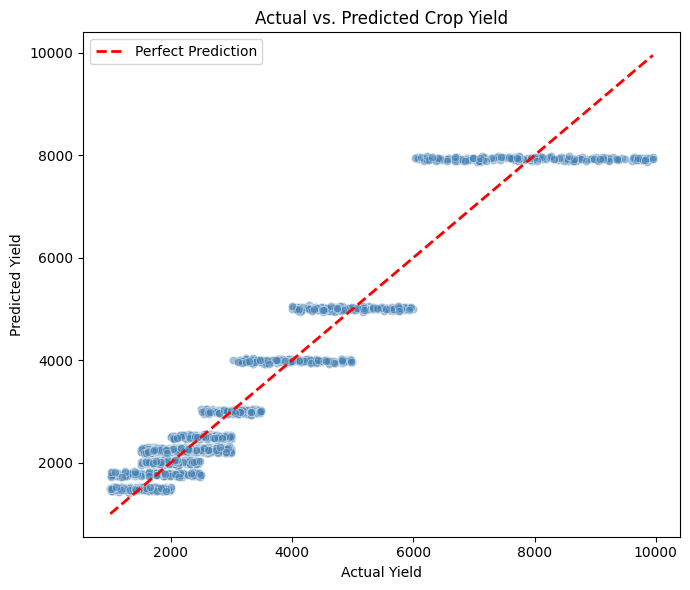

In [55]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="steelblue", edgecolors="white", linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Crop Yield")
plt.legend()
plt.tight_layout()
plt.show()

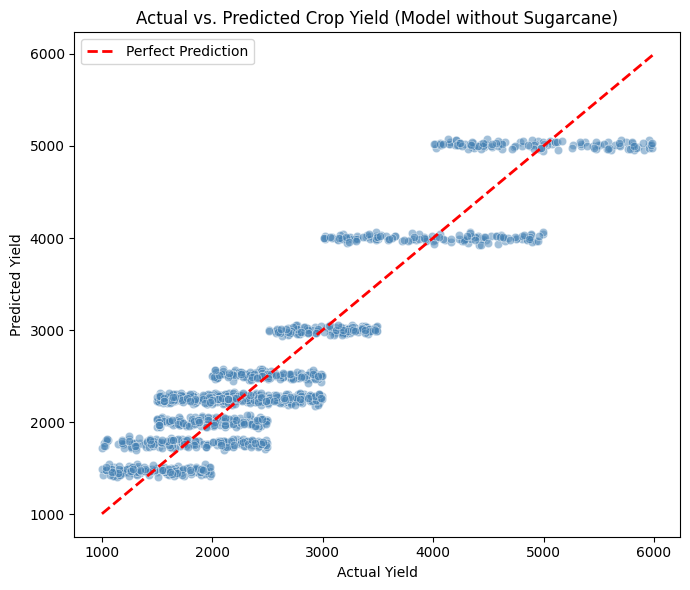

In [62]:
plt.figure(figsize=(7, 6))
plt.scatter(y1_test, y1_pred, alpha=0.5, color="steelblue", edgecolors="white", linewidth=0.5)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], "r--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Crop Yield (Model without Sugarcane)")
plt.legend()
plt.tight_layout()
plt.show()

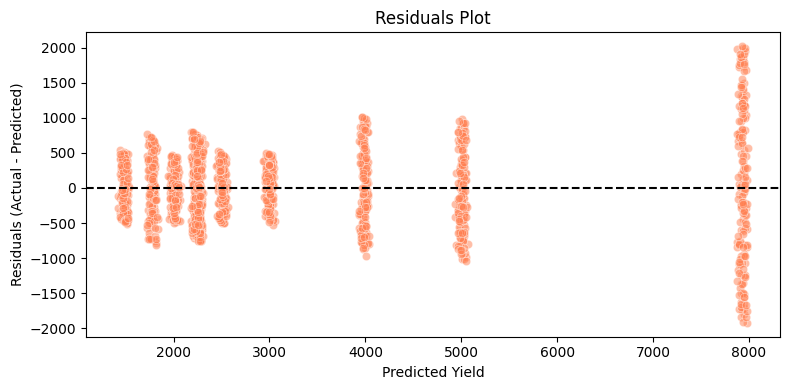

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.5, color="coral", edgecolors="white", linewidth=0.5)
plt.axhline(y=0, color="black", linestyle="--", lw=1.5)
plt.xlabel("Predicted Yield")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()

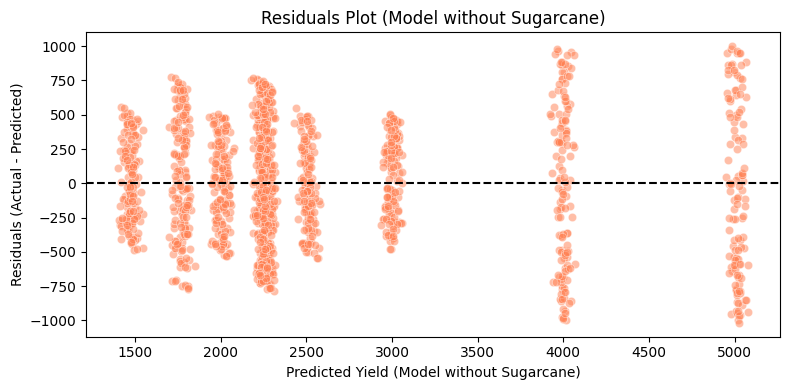

In [64]:
residuals1 = y1_test - y1_pred

plt.figure(figsize=(8, 4))
plt.scatter(y1_pred, residuals1, alpha=0.5, color="coral", edgecolors="white", linewidth=0.5)
plt.axhline(y=0, color="black", linestyle="--", lw=1.5)
plt.xlabel("Predicted Yield (Model without Sugarcane)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot (Model without Sugarcane)")
plt.tight_layout()
plt.show()

In [66]:
coef_df = pd.DataFrame({
    "Feature":     X.columns,
    "Coefficient": model.coef_
})

coef_df["Abs_Coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Abs_Coef", ascending=False).drop(columns="Abs_Coef")

print(coef_df.to_string(index=False))

                 Feature  Coefficient
     Crop Type_Sugarcane  1570.316299
         Crop Type_Paddy   708.018920
         Crop Type_Maize   434.878554
        Crop Type_Cotton  -293.121053
        Crop Type_Pulses  -211.631741
         Crop Type_Wheat   145.813977
       Crop Type_Tobacco  -143.081142
     Crop Type_Oil seeds   -74.584277
   Crop Type_Ground Nuts   -70.893308
       Crop Type_Millets   -69.971742
           Soil Type_Red    14.418836
        Soil Type_Clayey    13.276415
                Moisture    13.257278
         Soil Type_Loamy     9.642078
             Temparature    -8.989242
                Nitrogen     6.970127
                Humidity     6.059133
             Phosphorous     4.611375
Fertilizer Name_14-35-14     4.309578
               Potassium    -4.016652
         Soil Type_Sandy    -3.999020
   Fertilizer Name_20-20    -3.113305
     Fertilizer Name_DAP    -2.189105
   Fertilizer Name_28-28    -1.198021
Fertilizer Name_17-17-17    -0.823029
    Fertiliz

In [67]:
coef_df1 = pd.DataFrame({
    "Feature":     X1.columns,
    "Coefficient": model1.coef_
})

coef_df1["Abs_Coef"] = coef_df1["Coefficient"].abs()
coef_df1 = coef_df1.sort_values("Abs_Coef", ascending=False).drop(columns="Abs_Coef")

print("==== Model 2 Coefficients (without Sugarcane) ====")
print(coef_df1.to_string(index=False))

==== Model 2 Coefficients (without Sugarcane) ====
                 Feature  Coefficient
         Crop Type_Paddy   753.111566
         Crop Type_Maize   459.265858
        Crop Type_Cotton  -306.833555
        Crop Type_Pulses  -216.895318
         Crop Type_Wheat   152.620067
       Crop Type_Tobacco  -149.073894
   Crop Type_Ground Nuts   -76.482124
     Crop Type_Oil seeds   -76.409705
       Crop Type_Millets   -72.525426
   Fertilizer Name_28-28   -19.598543
     Fertilizer Name_DAP   -18.423457
           Soil Type_Red    16.848393
Fertilizer Name_14-35-14   -14.782430
                Moisture    13.626903
        Soil Type_Clayey    13.210266
         Soil Type_Loamy    11.649622
   Fertilizer Name_20-20   -11.357070
Fertilizer Name_17-17-17    -8.270263
                Nitrogen     7.170330
         Soil Type_Sandy     6.109113
             Temparature    -5.754943
    Fertilizer Name_Urea    -5.672796
               Potassium    -2.504929
                Humidity     2.046135

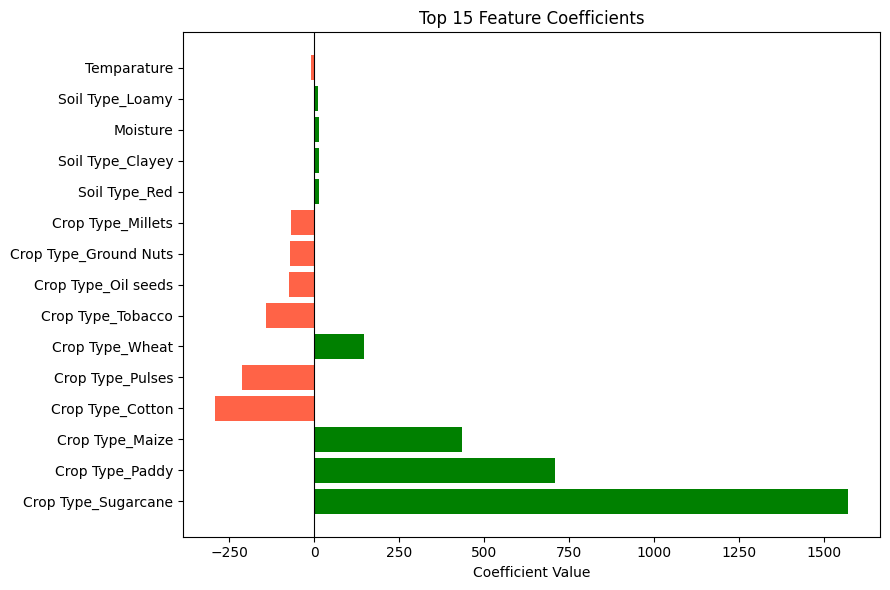

In [68]:
top = coef_df.head(15)

plt.figure(figsize=(9, 6))
colors = ["green" if c > 0 else "tomato" for c in top["Coefficient"]]
plt.barh(top["Feature"], top["Coefficient"], color=colors)
plt.axvline(x=0, color="black", linewidth=0.8)
plt.title("Top 15 Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

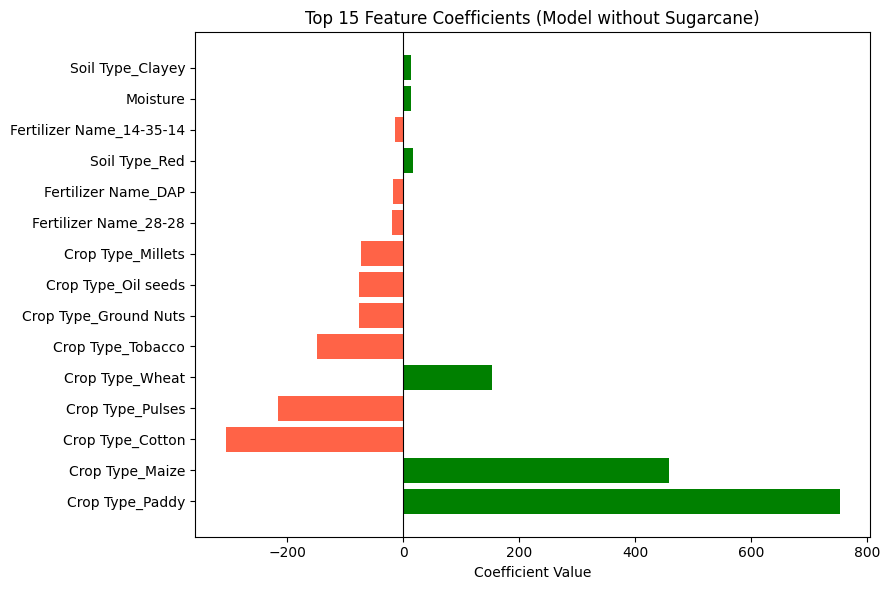

In [69]:
top1 = coef_df1.head(15)

plt.figure(figsize=(9, 6))
colors1 = ["green" if c > 0 else "tomato" for c in top1["Coefficient"]]
plt.barh(top1["Feature"], top1["Coefficient"], color=colors1)
plt.axvline(x=0, color="black", linewidth=0.8)
plt.title("Top 15 Feature Coefficients (Model without Sugarcane)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [71]:
import joblib
from google.colab import files

# Save the model
joblib.dump(model1, "crop_yield_model.pkl")
joblib.dump(scaler1, "crop_yield_scaler.pkl")

# Download to your local machine
files.download("crop_yield_model.pkl")
files.download("crop_yield_scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>